## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing dataset

In [2]:
df= pd.read_csv("data.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Analyzing dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe

<bound method NDFrame.describe of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6

## Checking dataset for null values

In [6]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

### Filling the missing values with 'None'

In [7]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('None')

In [8]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Convert "Normal" to "Normal Weight" in Feature - "BMI Category"

In [9]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [10]:
df['BMI Category']=np.where(df['BMI Category']=='Normal','Normal Weight',df['BMI Category'])

In [11]:
df['BMI Category'].value_counts()

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

### Converting 'Blood Pressure' to separate features - Systolic and Diastolic Pressure

In [12]:
df['Blood Pressure'].value_counts()

Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64

In [13]:
df['Systolic Pressure'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
df['Diastolic Pressure'] = df['Blood Pressure'].str.split('/').str[1].astype(int)

In [14]:
df.drop('Blood Pressure', axis=1, inplace=True)

In [15]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


#### Get all the numeric features

In [16]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 10


#### Get all categorical features

In [17]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 4


## Visualization

### "BMI Category Distribution" – This indicates that the chart visualizes the proportion of different BMI categories.

Text(0, 0.5, '')

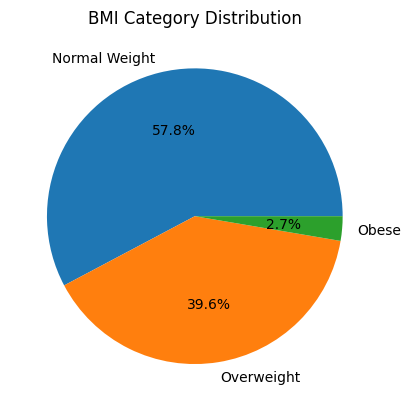

In [18]:
df['BMI Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('BMI Category Distribution')
plt.ylabel('')

#### Observations:
#### 1. The largest portion of individuals in the dataset fall under the Normal Weight category.
#### 2. The Overweight category is also significant.
#### 3. The Obese category makes up a very small proportion of the dataset.

### Count of Sleep Disorder by BMI Category

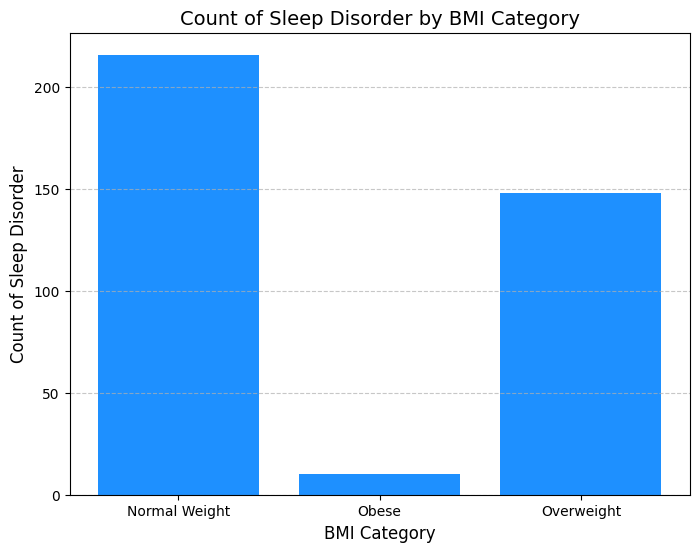

In [22]:
result = df.groupby('BMI Category')['Sleep Disorder'].count().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(result['BMI Category'], result['Sleep Disorder'], color='dodgerblue')

# Add titles and labels
plt.title('Count of Sleep Disorder by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count of Sleep Disorder', fontsize=12)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Count of Sleep Disorder by Stress Level

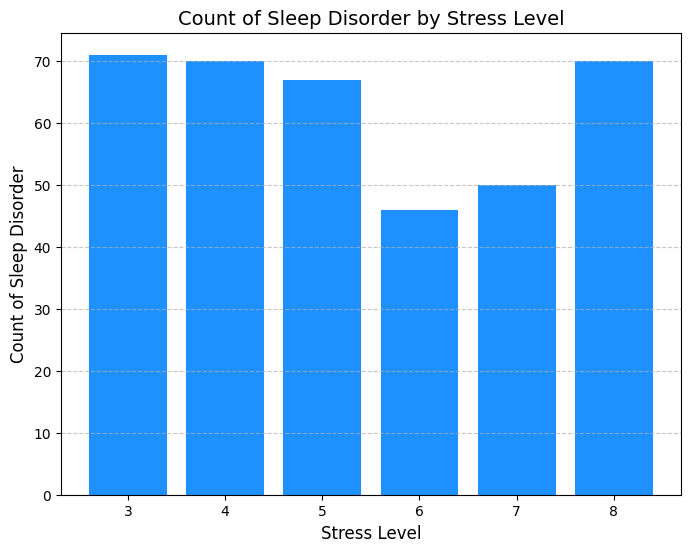

In [273]:
result = df.groupby('Stress Level')['Sleep Disorder'].count().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(result['Stress Level'], result['Sleep Disorder'], color='dodgerblue')

# Add titles and labels
plt.title('Count of Sleep Disorder by Stress Level', fontsize=14)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Count of Sleep Disorder', fontsize=12)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Count of Sleep Disorder by Occupation

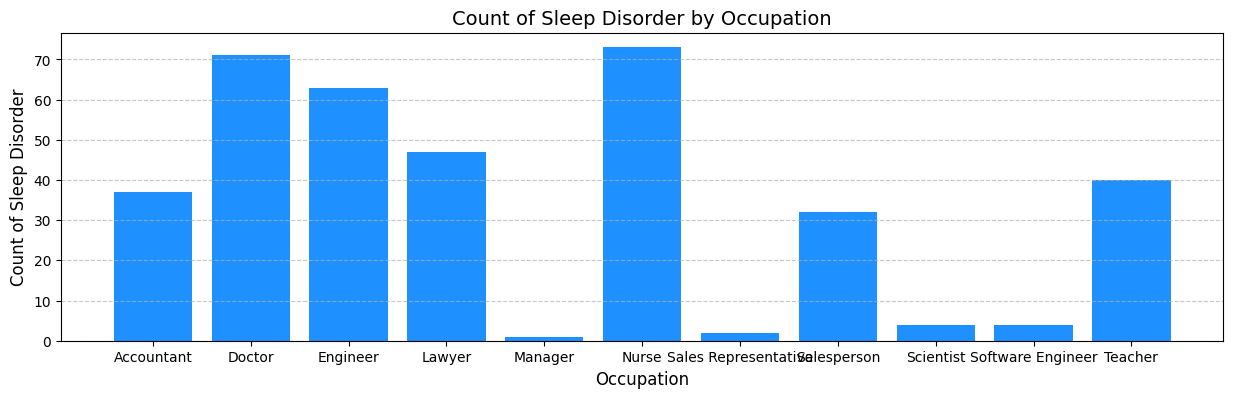

In [274]:
result = df.groupby('Occupation')['Sleep Disorder'].count().reset_index()

plt.figure(figsize=(15, 4))
plt.bar(result['Occupation'], result['Sleep Disorder'], color='dodgerblue')

# Add titles and labels
plt.title('Count of Sleep Disorder by Occupation', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count of Sleep Disorder', fontsize=12)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Encoding the categorical features

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label=LabelEncoder()

In [30]:
df['Gender'] = label.fit_transform(df['Gender'])
df.Gender.value_counts()

Gender
1    189
0    185
Name: count, dtype: int64

In [31]:
df['BMI Category'] = label.fit_transform(df['BMI Category'])
df['BMI Category'].value_counts()

BMI Category
0    216
2    148
1     10
Name: count, dtype: int64

In [32]:
df['Sleep Disorder'] = label.fit_transform(df['Sleep Disorder'])
df['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [35]:
df['Occupation'] = label.fit_transform(df['Occupation'])
df['Occupation'].value_counts()

Occupation
5     73
1     71
2     63
3     47
10    40
0     37
7     32
9      4
8      4
6      2
4      1
Name: count, dtype: int64

In [226]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,1,85,3000,2,140,90


#### Drop column - 'Person ID'

In [36]:
df.drop('Person ID', axis=1, inplace=True)

In [37]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic Pressure',
       'Diastolic Pressure'],
      dtype='object')

### Dividing features into dependent and independent features

In [39]:
X=df[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate','Daily Steps', 'Systolic Pressure','Diastolic Pressure']]
y=df['Sleep Disorder']

In [40]:
X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
0,1,27,9,6.1,6,42,6,2,77,4200,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,140,90


In [41]:
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

### Train Test Split the data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((299, 12), (75, 12))

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X_train=scaler.fit_transform(X_train)

In [47]:
X_test=scaler.transform(X_test)

In [48]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.044466,0.055811,1.052791,-0.833457,-1.155098,-0.728644,0.956601,1.208787,0.481081,-0.554643,0.186918,0.050678
1,1.044466,-1.111141,-0.900371,-1.468533,-1.155098,-1.450369,1.522984,-0.844777,0.481081,-1.180447,-0.448177,-0.746830
2,1.044466,-0.877751,1.703845,0.436694,0.537913,-0.006920,-0.176166,-0.844777,-0.014076,0.696966,-1.083272,-0.746830
3,-0.957427,1.922934,0.401737,1.325801,1.384419,0.714805,-1.308933,1.208787,-0.509234,0.071162,1.457107,1.645692
4,-0.957427,-1.577922,0.401737,-0.833457,-2.001604,-0.969219,0.956601,-0.844777,2.461710,-1.806251,0.440955,0.369681
...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.044466,-1.111141,-0.900371,-1.341518,-1.155098,-1.450369,1.522984,-0.844777,0.481081,-1.180447,-0.448177,-0.746830
295,-0.957427,-0.644360,0.401737,-1.341518,-1.155098,-0.872989,0.390217,1.208787,1.718974,-1.681090,-0.321158,-0.268325
296,-0.957427,0.755982,0.401737,-1.341518,-1.155098,1.436530,1.522984,1.208787,1.223817,1.948575,1.457107,1.645692
297,-0.957427,1.689543,0.401737,1.325801,1.384419,0.714805,-1.308933,1.208787,-0.509234,0.071162,1.457107,1.645692


In [239]:
y_train

192    0
75     1
84     1
362    2
16     2
      ..
71     1
106    1
270    2
348    2
102    1
Name: Sleep Disorder, Length: 299, dtype: int32

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [241]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "SVC":SVC() 
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_test_pred = model.predict(X_test)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted') # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted') # Calculate Recall


    
    
    print('----------------------------------')
    print(list(models.keys())[i])
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    #print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

----------------------------------
Logisitic Regression
Model performance for Test set
- Accuracy: 0.8800
- F1 score: 0.8806
- Precision: 0.8874
- Recall: 0.8800


----------------------------------
Random Forest
Model performance for Test set
- Accuracy: 0.8800
- F1 score: 0.8785
- Precision: 0.8819
- Recall: 0.8800


----------------------------------
Gradient Boost
Model performance for Test set
- Accuracy: 0.9067
- F1 score: 0.9058
- Precision: 0.9055
- Recall: 0.9067


----------------------------------
SVC
Model performance for Test set
- Accuracy: 0.8667
- F1 score: 0.8670
- Precision: 0.8731
- Recall: 0.8667




### Hyperparameter Tuning

In [245]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 8, 15],
             "n_estimators": [100, 200]}
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15],
             "n_estimators": [100, 200],
              "max_depth": [5, 8, 15, None]
                }

In [246]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("GradientBoost", GradientBoostingClassifier(), gradient_params)
                   
                   ]

In [247]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 90 candidates, totalling 270 fits


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
234 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py",

---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 5}
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'loss': 'log_loss', 'criterion': 'friedman_mse'}


In [250]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=200,min_samples_split=8,
                                          max_features=5,max_depth=5),
    "GradientBoostclassifier":GradientBoostingClassifier(n_estimators=100,
                                                        min_samples_split=2,
                                                        max_depth=5,
                                                        loss='log_loss',
                                                        criterion='friedman_mse')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    y_test_pred = model.predict(X_test)

    
 # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted') # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted') # Calculate Recall



    print(list(models.keys())[i])
    

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    
    print('='*35)
    print('\n')

Random Forest
----------------------------------
Model performance for Test set
- Accuracy: 0.8800
- F1 score: 0.8785
- Precision: 0.8819
- Recall: 0.8800


GradientBoostclassifier
----------------------------------
Model performance for Test set
- Accuracy: 0.8800
- F1 score: 0.8785
- Precision: 0.8819
- Recall: 0.8800


